# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [57]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd

from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from Tools.MCSIM import MCSimulation
from forex_python.bitcoin import BtcConverter

%matplotlib inline

In [58]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [59]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3


#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [60]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [61]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [62]:
# Using the Python requests library, make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
btc_dict = json.dumps(btc_response, indent=4, sort_keys=True)


In [63]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
eth_dict = json.dumps(eth_response, indent=4, sort_keys=True)




#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [64]:
print(btc_dict)

{
    "data": {
        "1": {
            "circulating_supply": 19053712,
            "id": 1,
            "last_updated": 1653927177,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 583950341026,
                    "percent_change_1h": 0.362829749479572,
                    "percent_change_24h": 4.7286124477806,
                    "percent_change_7d": 0.9734788007145,
                    "percentage_change_1h": 0.362829749479572,
                    "percentage_change_24h": 4.7286124477806,
                    "percentage_change_7d": 0.9734788007145,
                    "price": 30647.0,
                    "volume_24h": 26025274789
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19053712,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies": 31

In [65]:
btc_response['data']['1']['quotes']['USD']['price']

30647.0

In [66]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(btc_price)

30647.0


In [67]:
print(eth_dict)

{
    "data": {
        "1027": {
            "circulating_supply": 120983863,
            "id": 1027,
            "last_updated": 1653927283,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 231203767368,
                    "percent_change_1h": 0.374088229804157,
                    "percent_change_24h": 5.99842419121241,
                    "percent_change_7d": -6.61139797009355,
                    "percentage_change_1h": 0.374088229804157,
                    "percentage_change_24h": 5.99842419121241,
                    "percentage_change_7d": -6.61139797009355,
                    "price": 1911.33,
                    "volume_24h": 14703296745
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120983863,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [68]:
eth_response['data']['1027']['quotes']['USD']['price']

1911.33

In [69]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(eth_price)


1911.33


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [70]:
b = BtcConverter() # add "force_decimal=True" parmeter to get Decimal rates
current_price = b.get_latest_price('USD')# you can directly call get_latest_price('USD')

current_price

30607.2932

In [71]:
coindesk = b.convert_btc_to_cur(btc_coins, 'USD')  # convert_to_btc(5000, 'USD')

btc_convert = btc_price * btc_coins 

display(coindesk)

display(btc_convert)

36728.75184

36776.4

In [72]:
# Compute the current value of the BTC holding 
btc_value = btc_convert # convert_to_btc(5000, 'USD')

# Print current value of your holding in BTC
btc_value


36776.4

In [73]:
# Compute the current value of the ETH holding 

eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
eth_value


10130.048999999999

In [74]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


46906.449

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [75]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [76]:
# Set the variables for the Alpaca API and secret keys
Alpaca_API = os.getenv('Alpaca_API')
Alpaca_S_API = os.getenv('Alpaca_S_API')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(Alpaca_API,
                       Alpaca_S_API,
                       api_version="v2")
                      


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [77]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','AGG']

In [78]:
# Set timeframe to 1Day
timeframe = '1day'

In [79]:
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2020-08-07',tz = "America/New_York").isoformat()
end_date = pd.Timestamp('2020-08-07',tz = "America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [80]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY =  prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

               
SPY
          
AGG =  prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

AGG
# Concatenate the ticker DataFrames
prices_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [81]:
prices_df['AGG']['close'][0]

119.43

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [82]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df['AGG']['close'][0]

# Print the AGG closing price
print(agg_close_price)


119.43


In [83]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price =prices_df['SPY']['close'][0]

# Print the SPY closing price
print(spy_close_price)


334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [84]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio

agg_value

23886.0

In [85]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value


36802.7

In [86]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds =spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


60688.7

In [87]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
total_portfolio


107595.149

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [88]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet ,total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[46906.449, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [89]:
# Create a Pandas DataFrame called savings_df 
df = {'Amount':savings_data}

savings_df = pd.DataFrame(df,index=['crypto','stock/bond'])

# Display the savings_df DataFrame
savings_df


,Amount
crypto,46906.449
stock/bond,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:ylabel='Amount'>

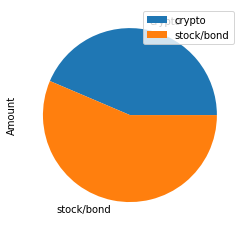

In [90]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [91]:
# Create a variable named emergency_fund_value
emergency_fund_value =  monthly_income * 3


emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [92]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print('CONGRATS YOU REACH YOUR GOAL and Beyond')
elif total_portfolio == emergency_fund_value:
     print('CONGRATS YOU REACH YOUR GOAL')
else:
    print( f'you are{total_portfoli-emergency_fund_value}away from your goal')
    



CONGRATS YOU REACH YOUR GOAL and Beyond


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [93]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2017-08-07',tz = "America/New_York").isoformat()
end_date = pd.Timestamp('2020-08-07',tz = "America/New_York").isoformat()



In [94]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
threeyears = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,).df



# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG = threeyears[threeyears['symbol']=='AGG']

SPY = threeyears[threeyears['symbol']=='SPY']


# Concatenate the ticker DataFrames
threeyears_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display both the first and last five rows of the DataFrame
display(threeyears_df.head())
display(threeyears_df.tail())


AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  109.69  109.72  109.6066  109.67  2359826   
2017-08-08 04:00:00+00:00  109.67  109.69  109.5000  109.57  2570876   
2017-08-09 04:00:00+00:00  109.87  109.87  109.6600  109.67  2308932   
2017-08-10 04:00:00+00:00  109.70  109.85  109.6700  109.78  2004163   
2017-08-11 04:00:00+00:00  109.75  109.94  109.6800  109.87  1913253   

                                                             SPY          \
                          trade_count        vwap symbol    open    high   
timestamp                                                                  
2017-08-07 04:00:00+00:00        7755  109.674876    AGG  247.50  247.87   
2017-08-08 04:00:00+00:00       12663  109.577636    AGG  247.49  248.91   
2017-08-09 04:00:00+00:00       11031  109.771749    AGG  246.46  247.31   
2017-08-10 04:00:00+00:00       12437  109.776611    AGG  246.30  246.44   
2017-08-11 04:00:00+00:00       10113  109.860974    AGG  244.00  244.80   

                                                                              \
                              low   close     volume trade_count        vwap   
timestamp                                                                      
2017-08-07 04:00:00+00:00  247.37  247.87   31995021      100111  247.668698   
2017-08-08 04:00:00+00:00  246.83  247.26   61719353      192921  247.739709   
2017-08-09 04:00:00+00:00  246.06  247.25   62632619      223650  246.791421   
2017-08-10 04:00:00+00:00  243.70  243.76  120418270      424321  245.027847   
2017-08-11 04:00:00+00:00  243.75  244.12   74869947      278786  244.222867   

                                  
                          symbol  
timestamp                         
2017-08-07 04:00:00+00:00    SPY  
2017-08-08 04:00:00+00:00    SPY  
2017-08-09 04:00:00+00:00    SPY  
2017-08-10 04:00:00+00:00    SPY  
2017-08-11 04:00:00+00:00    SPY

AGG                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-08-03 04:00:00+00:00  119.37  119.40  119.1903  119.40  13014535   
2020-08-04 04:00:00+00:00  119.42  119.63  119.4200  119.63  10935181   
2020-08-05 04:00:00+00:00  119.39  119.49  119.3100  119.40  17377874   
2020-08-06 04:00:00+00:00  119.62  119.73  119.5300  119.57   4608710   
2020-08-07 04:00:00+00:00  119.66  119.73  119.3950  119.43   5559066   

                                                             SPY          \
                          trade_count        vwap symbol    open    high   
timestamp                                                                  
2020-08-03 04:00:00+00:00       36359  119.282420    AGG  328.31  329.62   
2020-08-04 04:00:00+00:00       39114  119.541666    AGG  327.88  330.06   
2020-08-05 04:00:00+00:00       42313  119.387245    AGG  331.46  332.39   
2020-08-06 04:00:00+00:00       15938  119.604199    AGG  331.52  334.46   
2020-08-07 04:00:00+00:00       15246  119.475306    AGG  333.29  334.88   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2020-08-03 04:00:00+00:00  327.73  328.79  53080454      288008  328.658804   
2020-08-04 04:00:00+00:00  327.86  330.06  41918004      250900  329.057593   
2020-08-05 04:00:00+00:00  331.18  332.11  42870955      241416  331.791643   
2020-08-06 04:00:00+00:00  331.13  334.33  43745653      290039  332.937218   
2020-08-07 04:00:00+00:00  332.30  334.57  57282821      350100  333.800372   

                                  
                          symbol  
timestamp                         
2020-08-03 04:00:00+00:00    SPY  
2020-08-04 04:00:00+00:00    SPY  
2020-08-05 04:00:00+00:00    SPY  
2020-08-06 04:00:00+00:00    SPY  
2020-08-07 04:00:00+00:00    SPY

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [106]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_SPY_weight = [.40,.60]

MC_thirtyyear_even = MCSimulation(
    portfolio_data = threeyears_df ,
    weights = MC_SPY_weight,
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear_even.portfolio_data.head()


AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  109.69  109.72  109.6066  109.67  2359826   
2017-08-08 04:00:00+00:00  109.67  109.69  109.5000  109.57  2570876   
2017-08-09 04:00:00+00:00  109.87  109.87  109.6600  109.67  2308932   
2017-08-10 04:00:00+00:00  109.70  109.85  109.6700  109.78  2004163   
2017-08-11 04:00:00+00:00  109.75  109.94  109.6800  109.87  1913253   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-08-07 04:00:00+00:00        7755  109.674876    AGG          NaN  247.50   
2017-08-08 04:00:00+00:00       12663  109.577636    AGG    -0.000912  247.49   
2017-08-09 04:00:00+00:00       11031  109.771749    AGG     0.000913  246.46   
2017-08-10 04:00:00+00:00       12437  109.776611    AGG     0.001003  246.30   
2017-08-11 04:00:00+00:00       10113  109.860974    AGG     0.000820  244.00   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2017-08-07 04:00:00+00:00  247.87  247.37  247.87   31995021      100111   
2017-08-08 04:00:00+00:00  248.91  246.83  247.26   61719353      192921   
2017-08-09 04:00:00+00:00  247.31  246.06  247.25   62632619      223650   
2017-08-10 04:00:00+00:00  246.44  243.70  243.76  120418270      424321   
2017-08-11 04:00:00+00:00  244.80  243.75  244.12   74869947      278786   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-08-07 04:00:00+00:00  247.668698    SPY          NaN  
2017-08-08 04:00:00+00:00  247.739709    SPY    -0.002461  
2017-08-09 04:00:00+00:00  246.791421    SPY    -0.000040  
2017-08-10 04:00:00+00:00  245.027847    SPY    -0.014115  
2017-08-11 04:00:00+00:00  244.222867    SPY     0.001477

In [107]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear_even.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 110.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 120.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 130.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 140.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 150.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 160.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 170.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 180.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 190.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 200.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 210.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 220.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 230.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 240.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 250.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 260.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 270.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 280.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 290.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 300.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 310.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 320.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 330.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 340.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 350.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 360.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 370.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 380.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 390.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 400.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 410.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 420.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 430.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 440.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 450.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 460.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 470.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 480.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 490.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001840,0.994524,0.997422,0.996187,1.006059,0.978626,1.004036,1.015436,0.997041,1.014024,...,1.001158,0.979693,1.011522,0.996394,0.997543,0.999391,1.007924,1.009188,1.001817,0.999486
2,1.006863,1.007719,1.001341,0.999883,1.016417,0.972014,0.993154,1.021314,1.001033,1.023328,...,1.006471,0.972471,1.006751,1.013030,0.990704,1.006877,1.025866,1.013317,1.009879,1.013789
3,0.997707,1.025361,0.992374,1.027311,1.014299,0.954315,0.983815,1.020113,0.997843,1.014123,...,0.996626,0.975436,0.999531,1.022073,1.004827,1.009562,1.029528,1.011464,1.017323,1.023852
4,0.996586,1.035215,0.993403,1.020739,1.004030,0.947230,0.985291,1.032067,1.000165,1.026750,...,0.982377,0.964921,1.002661,1.003510,1.005476,1.020013,1.031078,1.012224,1.031831,1.019808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.235913,8.263433,6.222932,6.825447,20.503893,13.974864,3.181432,3.016635,10.465396,5.493712,...,6.890184,4.118696,20.300776,3.079407,6.208807,5.605459,10.811660,14.762398,13.273377,2.640920
7557,4.245654,8.124869,6.229604,6.840258,20.314743,13.987037,3.160815,3.044030,10.505649,5.434937,...,6.787471,4.132203,20.071175,3.112234,6.169083,5.530496,10.883584,14.726312,13.294253,2.623378
7558,4.323307,8.025032,6.334400,6.752533,20.566688,14.012600,3.107082,3.044051,10.438847,5.382172,...,6.781364,4.165624,20.363898,3.083923,6.177270,5.463466,10.860000,14.535162,13.314947,2.588918
7559,4.321708,8.002363,6.313749,6.709274,20.628625,14.049760,3.064246,3.080600,10.385865,5.389440,...,6.760622,4.153905,20.440197,3.090439,6.152462,5.441888,10.823208,14.671769,13.126523,2.584950


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

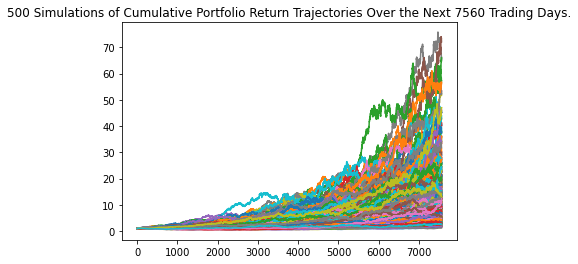

In [108]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_thirtyyear_even.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

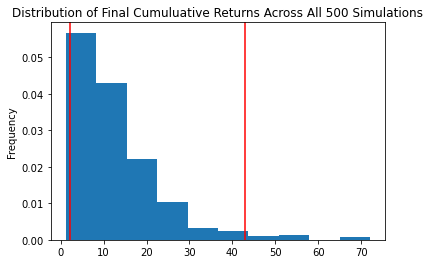

In [109]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_thirtyyear_even.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [110]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirtyyears_MC_SS = MC_thirtyyear_even.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
thirtyyears_MC_SS

C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean             13.200380
std              10.586204
min               1.190695
25%               6.081720
50%              10.398615
75%              17.234273
max              72.083959
95% CI Lower      2.247632
95% CI Upper     42.882701
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [111]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


60688.7

In [112]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = thirtyyears_MC_SS[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = thirtyyears_MC_SS[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
      f" with an 60/40 split that over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $60688.7 in the portfolio with an 60/40 split that over the next 30 years will end within in the range of $ 136405.87 and $ 2602495.38.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [114]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_STOCK_weight = [.20,.80]

MC_thirtyyear_stock = MCSimulation(
    portfolio_data = threeyears_df ,
    weights = MC_STOCK_weight,
    num_simulation = 500,
    num_trading_days = 252*10
)


# Review the simulation input data
MC_thirtyyear_stock.portfolio_data.head()


AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  109.69  109.72  109.6066  109.67  2359826   
2017-08-08 04:00:00+00:00  109.67  109.69  109.5000  109.57  2570876   
2017-08-09 04:00:00+00:00  109.87  109.87  109.6600  109.67  2308932   
2017-08-10 04:00:00+00:00  109.70  109.85  109.6700  109.78  2004163   
2017-08-11 04:00:00+00:00  109.75  109.94  109.6800  109.87  1913253   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-08-07 04:00:00+00:00        7755  109.674876    AGG          NaN  247.50   
2017-08-08 04:00:00+00:00       12663  109.577636    AGG    -0.000912  247.49   
2017-08-09 04:00:00+00:00       11031  109.771749    AGG     0.000913  246.46   
2017-08-10 04:00:00+00:00       12437  109.776611    AGG     0.001003  246.30   
2017-08-11 04:00:00+00:00       10113  109.860974    AGG     0.000820  244.00   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2017-08-07 04:00:00+00:00  247.87  247.37  247.87   31995021      100111   
2017-08-08 04:00:00+00:00  248.91  246.83  247.26   61719353      192921   
2017-08-09 04:00:00+00:00  247.31  246.06  247.25   62632619      223650   
2017-08-10 04:00:00+00:00  246.44  243.70  243.76  120418270      424321   
2017-08-11 04:00:00+00:00  244.80  243.75  244.12   74869947      278786   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-08-07 04:00:00+00:00  247.668698    SPY          NaN  
2017-08-08 04:00:00+00:00  247.739709    SPY    -0.002461  
2017-08-09 04:00:00+00:00  246.791421    SPY    -0.000040  
2017-08-10 04:00:00+00:00  245.027847    SPY    -0.014115  
2017-08-11 04:00:00+00:00  244.222867    SPY     0.001477

In [115]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_thirtyyear_stock.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 110.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 120.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 130.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 140.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 150.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 160.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 170.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 180.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 190.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 200.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 210.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 220.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 230.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 240.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 250.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 260.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 270.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 280.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 290.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 300.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 310.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 320.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 330.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 340.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 350.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 360.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 370.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 380.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 390.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 400.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 410.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 420.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 430.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 440.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 450.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 460.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 470.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 480.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

Running Monte Carlo simulation number 490.


C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is u

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987403,1.010696,0.989211,1.006530,0.989938,1.000225,1.012839,0.999166,0.999941,0.986212,...,1.014408,1.017170,0.998872,0.995085,1.009476,1.000587,1.014246,1.004778,1.008698,0.976699
2,0.974644,1.029667,0.990071,1.010057,0.985116,1.002759,1.004357,0.997744,0.991871,0.962863,...,1.018104,1.010447,1.002751,0.999535,1.030290,1.011188,1.018779,0.999663,0.993976,0.980592
3,0.973953,1.046676,0.988091,1.018985,1.011087,1.008779,1.010783,1.014041,0.986196,0.950419,...,1.009906,1.002568,0.979272,1.022033,1.029341,1.014686,1.034135,1.020140,1.008848,0.998171
4,0.971089,1.034877,0.974437,1.031199,1.013258,0.977527,1.015898,1.016440,0.994479,0.964205,...,1.025337,0.999488,0.982859,1.003004,1.031507,1.026079,1.019070,1.015207,1.000913,0.986396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.192744,7.643511,4.588101,2.112025,4.826126,1.168423,3.719999,2.658224,2.386500,3.300108,...,3.094426,3.873523,3.251820,1.734509,0.797267,3.696443,3.509735,3.203076,1.290217,2.434494
2517,2.180775,7.767469,4.563029,2.121168,4.855357,1.164418,3.770507,2.647043,2.362485,3.279614,...,3.148121,3.919632,3.262353,1.702376,0.809272,3.727520,3.532248,3.281739,1.282186,2.408291
2518,2.182783,7.862169,4.568057,2.115579,4.874281,1.148997,3.775783,2.624713,2.332254,3.308648,...,3.118671,3.929158,3.247557,1.711625,0.783980,3.669642,3.470127,3.324717,1.282402,2.436934
2519,2.216528,8.024103,4.643542,2.110033,4.937045,1.151915,3.777906,2.643682,2.384856,3.330044,...,3.153087,3.924985,3.274684,1.713256,0.780837,3.592236,3.547751,3.327382,1.308977,2.394787


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

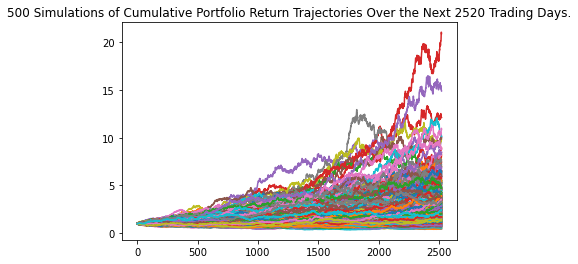

In [116]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_thirtyyear_stock. plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

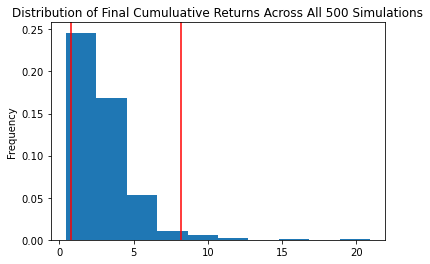

In [117]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_thirtyyear_stock.plot_distribution()


In [118]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
thirtyyears_stock = MC_thirtyyear_stock.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
thirtyyears_stock

C:\Desktop\UC\Api\Project\Financial-Planner\Financial planner\Tools\MCSIM.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              2.938945
std               2.017485
min               0.434476
25%               1.686861
50%               2.462376
75%               3.577665
max              20.924244
95% CI Lower      0.797540
95% CI Upper      8.176974
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [119]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


60688.7

In [123]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = thirtyyears_stock[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = thirtyyears_stock[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
      f" with an 20/80 split that over the next 30 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $60688.7 in the portfolio with an 20/80 split that over the next 30 years will end within in the range of $ 48401.68 and $ 496249.94.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?